In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/raw/phishtank.csv")
df.head()


,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,9209807,https://alert-965.dataforges.cc/8f2c96c83-18eb...,http://www.phishtank.com/phish_detail.php?phis...,2025-09-12T14:14:37+00:00,yes,2025-09-12T14:21:46+00:00,yes,Microsoft
1,9209806,https://socket.brainclickads.com/node_modules/...,http://www.phishtank.com/phish_detail.php?phis...,2025-09-12T14:14:05+00:00,yes,2025-09-12T14:21:46+00:00,yes,Other
2,9209805,https://zmba.netlify.app,http://www.phishtank.com/phish_detail.php?phis...,2025-09-12T14:13:56+00:00,yes,2025-09-12T14:21:46+00:00,yes,Other
3,9209793,http://usa-trezor.com,http://www.phishtank.com/phish_detail.php?phis...,2025-09-12T14:01:50+00:00,yes,2025-09-12T14:12:30+00:00,yes,Other
4,9209794,https://usa-trezor.com/,http://www.phishtank.com/phish_detail.php?phis...,2025-09-12T14:01:50+00:00,yes,2025-09-12T14:12:30+00:00,yes,Other


In [24]:
# Xem thông tin tổng quan dataset
print("\n--- Info dataset ---")
df.info()

# Kiểm tra giá trị null
print("\n--- Missing values ---")
print(df.isnull().sum())



--- Info dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51160 entries, 0 to 51159
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   phish_id           51160 non-null  int64 
 1   url                51160 non-null  object
 2   phish_detail_url   51160 non-null  object
 3   submission_time    51160 non-null  object
 4   verified           51160 non-null  object
 5   verification_time  51160 non-null  object
 6   online             51160 non-null  object
 7   target             51160 non-null  object
dtypes: int64(1), object(7)
memory usage: 3.1+ MB

--- Missing values ---
phish_id             0
url                  0
phish_detail_url     0
submission_time      0
verified             0
verification_time    0
online               0
target               0
dtype: int64


In [25]:
# Thống kê mô tả
print("\n--- Describe dataset ---")
print(df.describe(include="all"))



--- Describe dataset ---
            phish_id                                                url  \
count   5.116000e+04                                              51160   
unique           NaN                                              51148   
top              NaN  https://storage.cloud.google.com/1lordman1man3...   
freq             NaN                                                  3   
mean    8.736166e+06                                                NaN   
std     4.096903e+05                                                NaN   
min     1.123978e+06                                                NaN   
25%     8.464578e+06                                                NaN   
50%     8.755280e+06                                                NaN   
75%     9.121692e+06                                                NaN   
max     9.209807e+06                                                NaN   

                                         phish_detail_url  \
count       


--- Label distribution ---
target
Other                       46715
Allegro                      1441
Internal Revenue Service      990
Facebook                      324
Microsoft                     221
                            ...  
Santander UK                    1
TSB                             1
Co-operative Bank               1
Virustotal                      1
Royal Bank of Canada            1
Name: count, Length: 99, dtype: int64


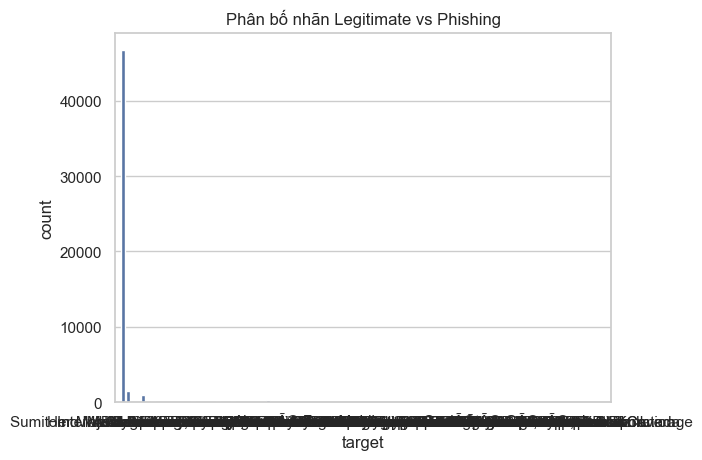

In [33]:
# Nếu cột nhãn là 'target'
if "target" in df.columns:
    print("\n--- Label distribution ---")
    print(df["target"].value_counts())

    sns.countplot(x="target", data=df)
    plt.title("Phân bố nhãn Legitimate vs Phishing")
    plt.show()


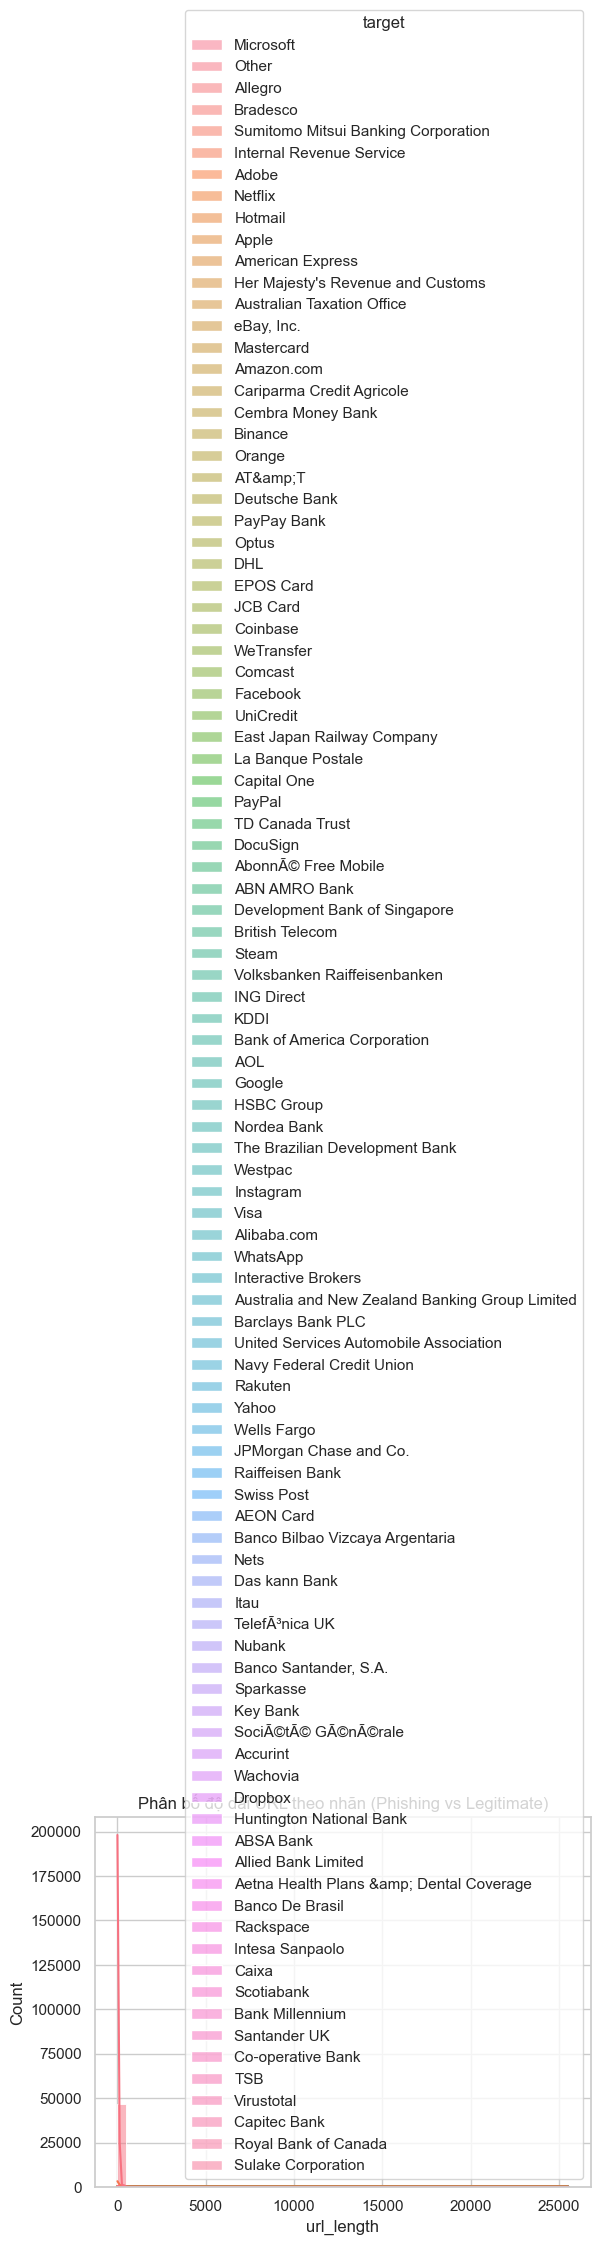

In [32]:
# Tính độ dài URL
df["url_length"] = df["url"].str.len()

# Vẽ histogram theo cột target
sns.histplot(data=df, x="url_length", hue="target", bins=50, kde=True)
plt.title("Phân bố độ dài URL theo nhãn (Phishing vs Legitimate)")
plt.show()


In [34]:
# Trích xuất domain từ URL
df["domain"] = df["url"].str.extract(r"https?://([^/]+)/")[0]

# Xem 20 domain xuất hiện nhiều nhất
print(df["domain"].value_counts().head(20))


domain
docs.google.com          6001
qrco.de                  2551
bit.ly                   2437
q-r.to                   1996
l.ead.me                 1974
new.express.adobe.com    1060
sites.google.com          997
www.dropbox.com           539
t.co                      415
ipfs.best-practice.se     234
l.wl.co                   225
ln.run                    220
tinyurl.com               189
eu.jotform.com            188
app.jotform.com           166
ipfs.io                   132
share-eu1.hsforms.com     129
share.hsforms.com         127
forms.office.com          117
www.flowcode.com           99
Name: count, dtype: int64


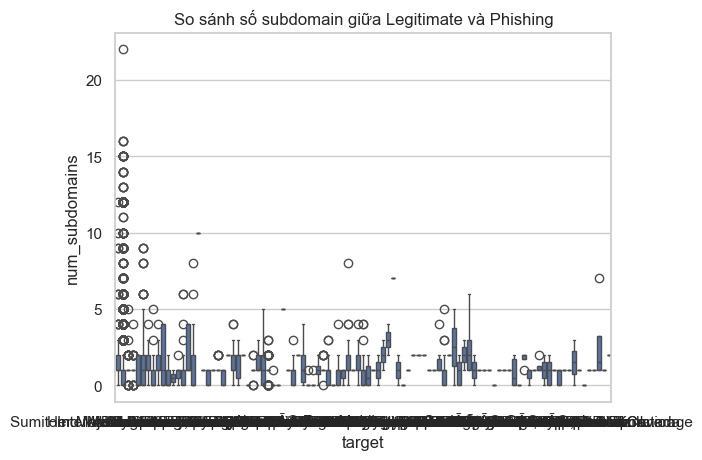

In [37]:
# Đếm số subdomain trong URL
df["num_subdomains"] = df["url"].str.count(r"\.") - 1

# Vẽ boxplot theo target
sns.boxplot(x="target", y="num_subdomains", data=df)
plt.title("So sánh số subdomain giữa Legitimate và Phishing")
plt.show()


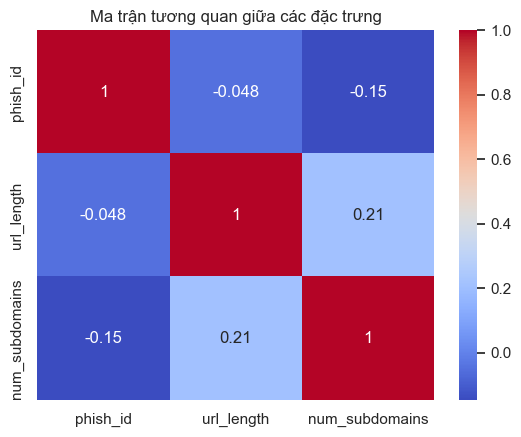

In [36]:
# Chỉ lấy các cột số để tính tương quan
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Ma trận tương quan giữa các đặc trưng")
plt.show()
